   Well ID        UWI Common Well Name            X            Y  \
0      158   BERL0001           BERL-1  1020207.798  1278820.347   
1      350   BERL0002           BERL-2  1022863.313  1279619.735   
2       19   CARD0001           CARD-1  1023881.317  1277912.935   
3      361   CARD0012          CARD-12  1023417.419  1278154.843   
4       39  CARD0001N          CARD-1N  1022533.697  1278615.780   

         Pick Name       Pick Z  Nearest Node Z  Surface Intersection Z  \
0  CCUS_01_DISC_TK  6958.999932       6977.0117               6966.7560   
1  CCUS_01_DISC_TK  7089.999829       7086.4653               7107.1720   
2  CCUS_01_DISC_TK  7909.999856       7841.2886               7842.2017   
3  CCUS_01_DISC_TK  7915.452128       7846.3100               7847.7830   
4  CCUS_01_DISC_TK  7872.611423       7932.9520               7937.7935   

       Delta  Delta Reverse  Absolute Delta Interpreter Id  Observation #  
0   7.755928      -7.755928        7.755928           LMRC      

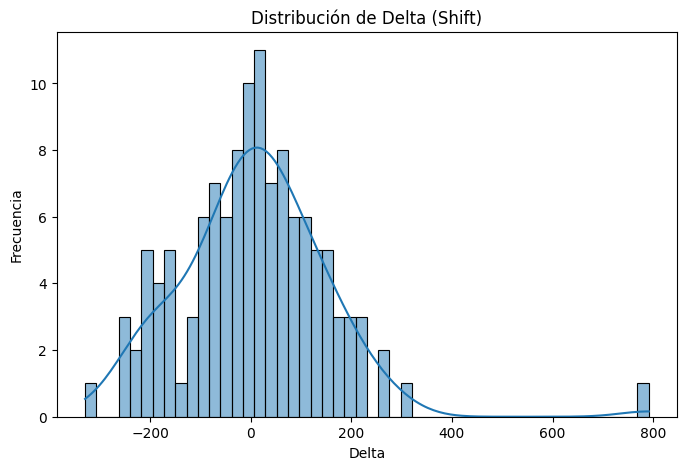

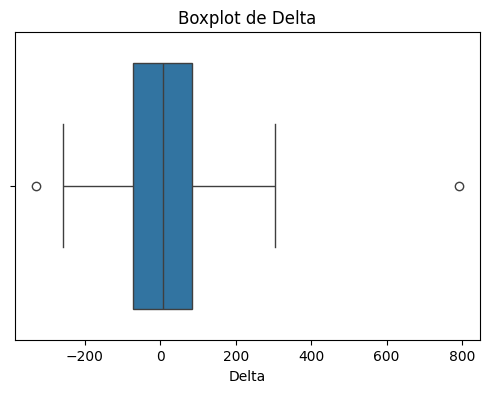

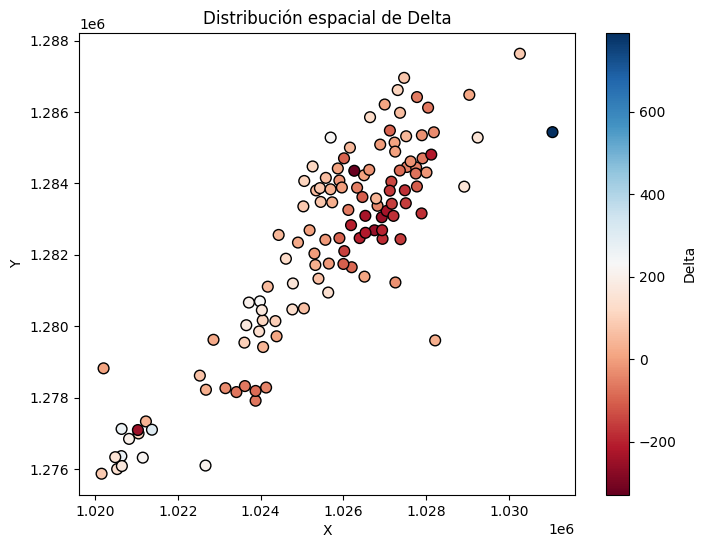

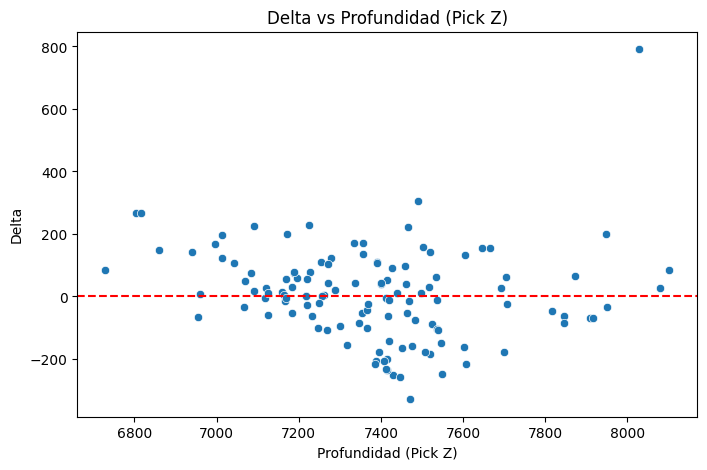

Archivo 'estadisticas_shifts.xlsx' exportado con éxito.


0

In [7]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout

# --- Cargar archivo CSV ---
RUTA = '/workspaces/ml-bootcamp-labs/data/raw/Shift_Pozos_LDiscEoc-cvs.csv'
df = pd.read_csv(RUTA, sep=';')

# Ver columnas y primeras filas
print(df.head())

# Mostrar nombres de columnas para confirmar
print("Columnas disponibles:", df.columns.tolist())

# 2. Selección de columnas clave
# ============================
# Ajusta aquí si los nombres cambian (usa exactamente los que aparecen en tu archivo)
col_delta = "Delta"
col_abs_delta = "Absolute Delta"
col_x = "X"
col_y = "Y"
col_pickz = "Pick Z"

# ============================
# 3. Estadísticos descriptivos
# ============================
stats = df[[col_delta, col_abs_delta]].describe(percentiles=[0.25,0.5,0.75])
print(stats)

# 4. Histogramas
# ============================
plt.figure(figsize=(8,5))
sns.histplot(df[col_delta], bins=50, kde=True)
plt.title("Distribución de Delta (Shift)")
plt.xlabel("Delta")
plt.ylabel("Frecuencia")
plt.show()


# 5. Boxplot
# ============================
plt.figure(figsize=(6,4))
sns.boxplot(x=df[col_delta])
plt.title("Boxplot de Delta")
plt.xlabel("Delta")
plt.show()


# 6. Mapa espacial
# ============================
plt.figure(figsize=(8,6))
sc = plt.scatter(df[col_x], df[col_y], c=df[col_delta], cmap="RdBu", s=60, edgecolor="k")
plt.colorbar(sc, label="Delta")
plt.title("Distribución espacial de Delta")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# 7. Correlación con profundidad
# ============================
plt.figure(figsize=(8,5))
sns.scatterplot(x=df[col_pickz], y=df[col_delta])
plt.title("Delta vs Profundidad (Pick Z)")
plt.xlabel("Profundidad (Pick Z)")
plt.ylabel("Delta")
plt.axhline(0, color="red", linestyle="--")
plt.show()

# ============================
# 8. Exportar estadísticas
# ============================
stats.to_excel("estadisticas_shifts.xlsx", index=True)
print("Archivo 'estadisticas_shifts.xlsx' exportado con éxito.")

with pd.ExcelWriter("estadisticas_shifts.xlsx", engine="xlsxwriter") as writer:
    stats.to_excel(writer, sheet_name="Estadísticas")

workbook  = writer.book
worksheet = writer.sheets["Estadísticas"]

worksheet.write_formula("E2", "=AVERAGE(B2:B100)")   

chart = workbook.add_chart({"type": "line"})
chart.add_series({
    "name":       "Shift X",
    "categories": "=Estadísticas!$A$2:$A$100",
    "values":     "=Estadísticas!$B$2:$B$100",
})
worksheet.insert_chart("G2", chart)